In [2]:
#Introduction to Machine learning
#Algorithms , models that help computer to learn and predict
#Applications of Machine Learning
"""
1. Image Processing
2. Speech Recognition
3. Fraud Detection

Approaches to Machine Learning
1. Supervised Learning:dataset that is labelled, predict,linear regression,
decision trees,support vector machine,neural networks,(supervised Learning Algorithm)
2. Unsupervised Learning;deals with unlabelled data,clustering algorithms to group data together
k-means clustering,hierachial clustering,PCA(Principle Computer Analysis)
3. Reinfrorcement Learning :

#Problem formulation!
Define the problem !Classification Task,Regression Analysis,Clustering,anomaly detection recommendations
2. Gather the data
3. Split the data
20, 80

Data Types
3. Categories of data
1. Numerical dat can be discrete(integers) or continuous(infinite values)
2. Categorical 
3. Original, measure again

"""

'\n1. Image Processing\n2. Speech Recognition\n3. Fraud Detection\n\nApproaches to Machine Learning\n1. Supervised Learning:dataset that is labelled, predict,linear regression,\ndecision trees,support vector machine,neural networks,(supervised Learning Algorithm)\n2. Unsupervised Learning;deals with unlabelled data,clustering algorithms to group data together\nk-means clustering,hierachial clustering,PCA(Principle Computer Analysis)\n3. Reinfrorcement Learning :\n\n#Problem formulation!\nDefine the problem !Classification Task,Regression Analysis,Clustering,anomaly detection recommendations\n2. Gather the data\n3. Split the data\n20, 80\n\nData Types\n3. Categories of data\n1. Numerical dat can be discrete(integers) or continuous(infinite values)\n2. Categorical \n3. Original, measure again\n\n'

In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Volumes/DATA/Anaconda/anaconda3/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #linear algebra
import seaborn as sns #data visualisation,statistical visualisation
import pandas as pd #data processing, CSV file
import matplotlib.pyplot as plt
%matplotlib inline 

#ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#control Display - optional
#pd.options.dispaly.max_columns= 50
sns.set(style="darkgrid", rc = {'axes.facecolor':'#CAF1DE'})
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
"""
cp = chest pain
trestbps = resting blood pressure
col = colesterol
fbs = fasting blood sugar
restecg = resting electrocardigraphy
exang = exercise induced agina
oldpeak = ST depression induced
slope = the slope of the peak exercise
ca = number of major vessel
thal = normal, fixed defect,reversible defect
target = have disease or not (1 = yes, 0 = no)
"""

'\ncp = chest pain\ntrestbps = resting blood pressure\ncol = colesterol\nfbs = fasting blood sugar\nrestecg = resting electrocardigraphy\nexang = exercise induced agina\noldpeak = ST depression induced\nslope = the slope of the peak exercise\nca = number of major vessel\nthal = normal, fixed defect,reversible defect\ntarget = have disease or not (1 = yes, 0 = no)\n'

In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
#show male and female
count_female = len(df[df.sex==0])
count_male = len(df[df.sex==1])
#show output
print ('Percentage of Female Patients: {:.2f}%'.format(count_female/(len(df.sex))*100))
print ('Percentage of Female Patients: {:.2f}%'.format(count_male/(len(df.sex))*100))

Percentage of Female Patients: 30.44%
Percentage of Female Patients: 69.56%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Text(0.5, 1.0, 'Heart disease frequency')

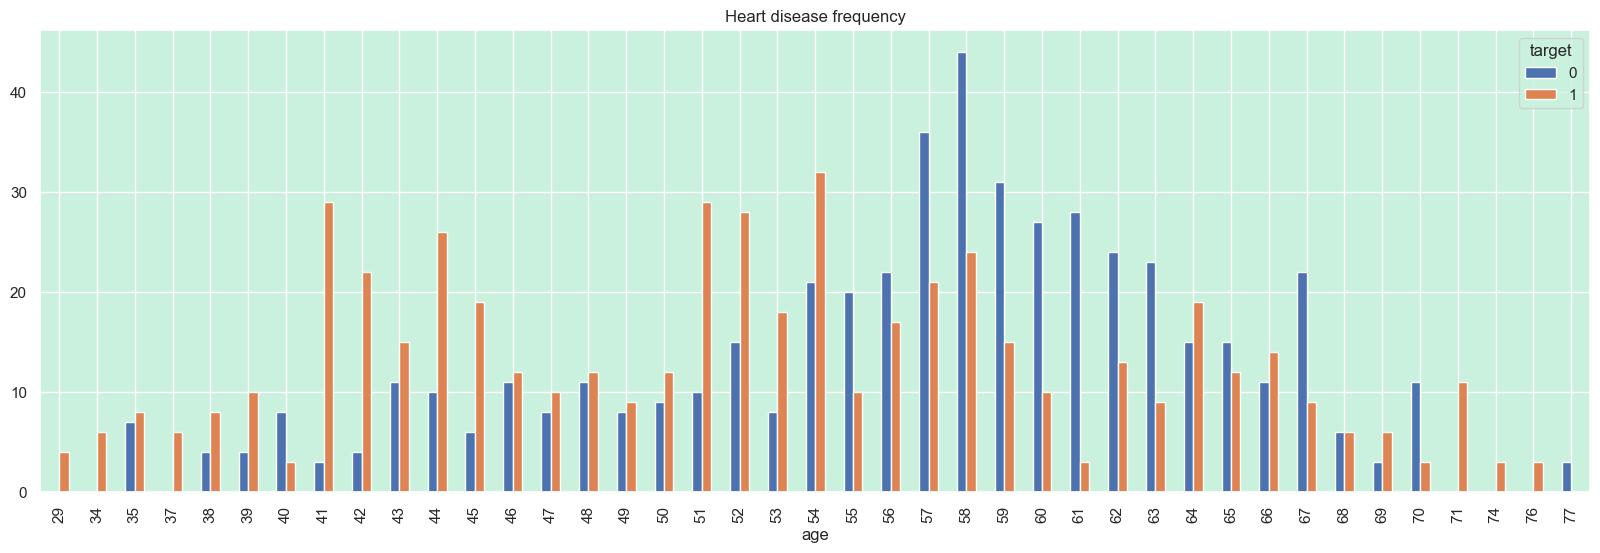

In [10]:
#Barploab(df.age.tart showing heart disease
pd.crosstab(df.age,df.target).plot(kind = 'bar', figsize = (20,6))
plt.title('Heart disease frequency')

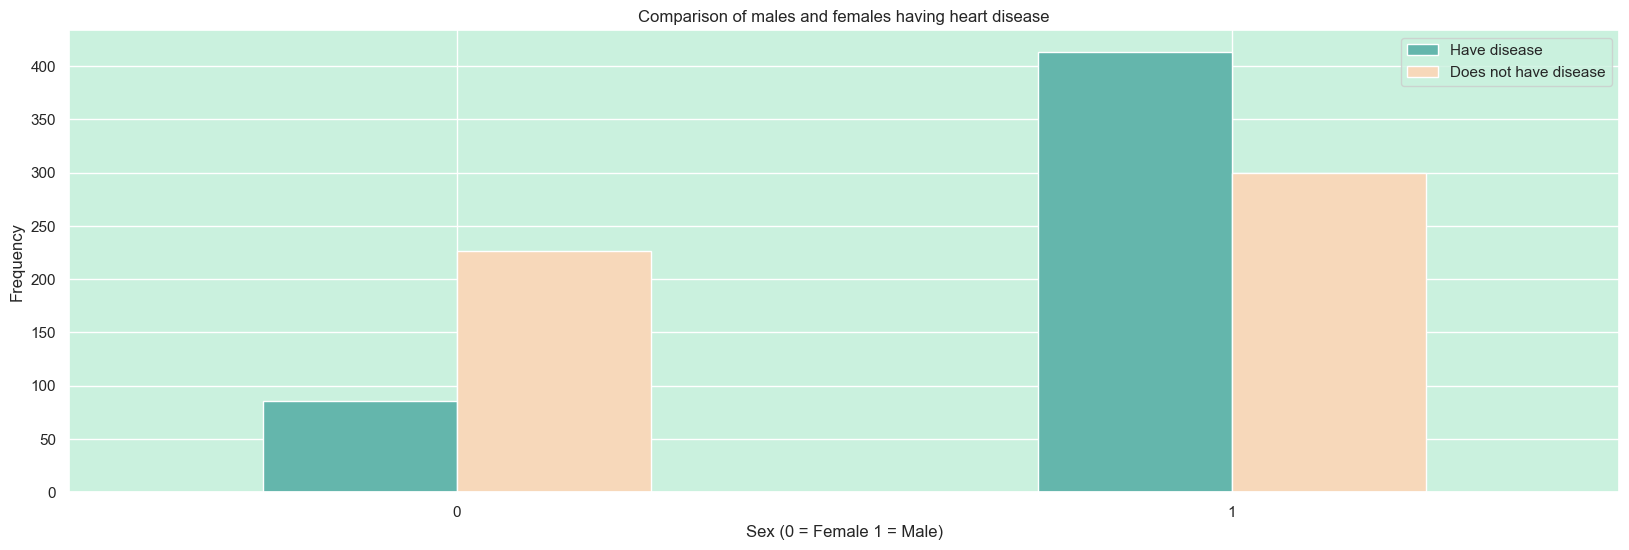

In [11]:
#Data visualisation of heart disease frequency for sex
pd.crosstab(df.sex,df.target).plot(kind = 'bar', figsize = (20,6) , color=['#64B6AC', '#F7D8BA'])
plt.title('Comparison of males and females having heart disease')
plt.xlabel('Sex (0 = Female 1 = Male)')
plt.legend(['Have disease','Does not have disease'])
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

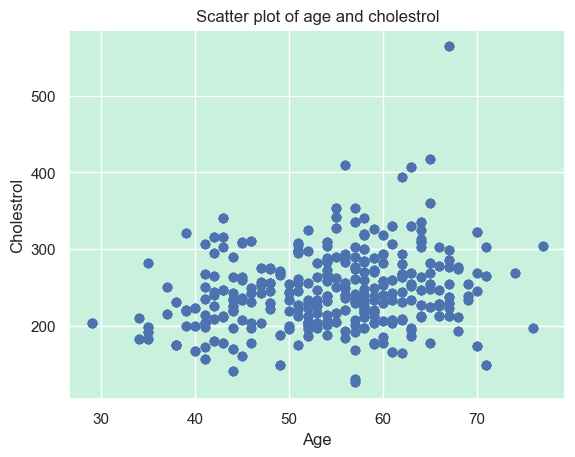

In [12]:
#Data visualisation of heart disease frequency for sex
plt.scatter(df.age,df.chol)
plt.title("Scatter plot of age and cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

In [13]:
#Working with ML model Accuracy of Different ML More
#Create model for logistic regression
#Solve problems based on classification.Create independent variables and dependent variables

In [14]:
#Create a model for logistic regression 
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [15]:
#Normalise the data , split the data for training and testing
#80% training 20% testing
#Normalise the data X = (X-Xmin)/(Xmax-Xmin)
x = (x_data - np.min(x_data))/(np.max(x_data)- np.min(x_data))


In [16]:
#Slite the data 80% training #20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [17]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

# Train and test Machine Learning